In [1]:
import pickle
import librosa
import random
import pandas as pd
import numpy as np
import torch
import itertools
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
import torch.utils.data as utils
from torch.utils.data import TensorDataset, DataLoader

# RNNs as a generative model 

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
image_size = 28
patch_size = 7
num_patches = 16

In [11]:
x_test_patches = []
y_test_patches = []

In [12]:
x_train_patches = []
y_train_patches = []

In [5]:
def patch_gen(image):
    patches = []
    for i in range(0, image_size, patch_size):
        for j in range(0, image_size, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patch_vector = patch.flatten()
            patches.append(patch_vector)
    return np.array(patches)

In [9]:
def gen_image(patch_vect, original_shape=(image_size, image_size), patch_size=(patch_size, patch_size)):
    const_img = np.zeros(original_shape)
    idx_p = 0

    # Reconstruct the image from vectorized patches
    for i in range(0, original_shape[0], patch_size[0]):
        for j in range(0, original_shape[1], patch_size[1]):
            patch = patch_vect[idx_p].reshape(patch_size)
            const_img[i:i+patch_size[0], j:j+patch_size[1]] = patch
            idx_p += 1

    return const_img

In [7]:
# Display patches of a sample image
def display_sample_patches(train_images):
    sample_image = train_images[700]
    sample_patches = patch_gen(sample_image).reshape(-1, 7, 7)
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(sample_patches[i], cmap='gray')
        ax.axis('off')
    plt.show()

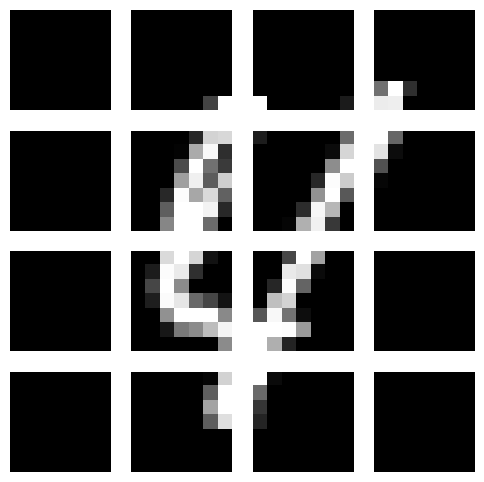

In [8]:
display_sample_patches(x_train)

In [13]:
for image in x_train:
    patches = patch_gen(image)
    x_train_patches.append(patches[:-1])
    y_train_patches.append(patches[1:])

In [14]:
for image in x_test:
    patches = patch_gen(image)
    x_test_patches.append(patches[:-1])
    y_test_patches.append(patches[1:])

In [15]:
x_train_patches = np.array(x_train_patches)
y_train_patches = np.array(y_train_patches)
# Convert the list to a NumPy array
x_test_patches = np.array(x_test_patches)
y_test_patches = np.array(y_test_patches)

In [ ]:
# Desining the Architecture using the hidden , cell and input to naavigate the patch flow.
input = tf.keras.layers.Input(shape=(None, 49))
hidden = tf.keras.layers.Input(shape=(64,))
cell_s = tf.keras.layers.Input(shape=(64,))
lstm1, hidden_1, cell_1 = tf.keras.layers.LSTM(64, return_sequences=True, return_state=True) (input, initial_state=[hidden, cell_s])
output = tf.keras.layers.Dense(49, activation='sigmoid')(lstm1)

model_reg = tf.keras.models.Model(inputs=[input, hidden, cell_s], outputs=[output, hidden_1, cell_1])
model_reg.compile(optimizer='adam', loss=['mse',None,None])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_state = np.zeros((x_train_patches.shape[0], 64))
test_state = np.zeros((x_test_patches.shape[0], 64))
history = model_reg.fit([x_train_patches, train_state, train_state], y_train_patches, epochs=100, batch_size=100,
                      validation_data=([x_test_patches, test_state, test_state], y_test_patches), callbacks=[early_stopping])

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.1223 - val_loss: 0.0681
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0637 - val_loss: 0.0555
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0537 - val_loss: 0.0490
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0481 - val_loss: 0.0450
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0445 - val_loss: 0.0425
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0422 - val_loss: 0.0409
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0406 - val_loss: 0.0396
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0395 - val_loss: 0.0384
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0383 - val_loss: 0.0376
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0375 - val_loss: 0.0369
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0369 - val_loss: 0.0363
Epoch 12/100
600/600 ━━━━━━━━

In [ ]:
digit_samples = {i: [] for i in range(10)}
for image, label in zip(x_test, y_test):
    if len(digit_samples[label]) < 10:
        digit_samples[label].append(image)

for digit, samples in digit_samples.items():
    digit_samples[digit] = np.array(samples)

In [ ]:
test_digits = digit_samples.values()
test_digits = np.array(list(test_digits))
test_digits = test_digits.reshape(100, 28, 28)

In [ ]:
vectorized_test_digits = []
for digit in test_digits:
    patches = patch_gen(digit)
    vectorized_test_digits.append(patches)

In [ ]:
digits_gen = []
for digit in vectorized_test_digits:
  # inputing the first 8 patches
    input_img = digit[:8]
  # using the hidden state and cell states of LSTM
    predicted_img, h_state, cell_state = model_reg.predict([input_img.reshape(1, 8, 49), np.zeros((1, 64)), np.zeros((1, 64))])

    predicted_img = predicted_img.reshape(8, 49)
    pred_patches = [predicted_img[7]]
    current_patch = predicted_img[7].reshape(1, 1, 49)
  # Appending the predicted image to the list and using the last 8 for next patch generation
    for i in range(8):
        current_patch, h_state, cell_state = model_reg.predict([current_patch, h_state, cell_state])
        pred_patches.append(current_patch.reshape(49))

    pred_patches = np.array(pred_patches[:-1])
    pred_patches = np.array(pred_patches)

    new_img = np.concatenate((input_img, pred_patches), axis=0)
    new_img = gen_image(new_img)
    digits_gen.append(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━

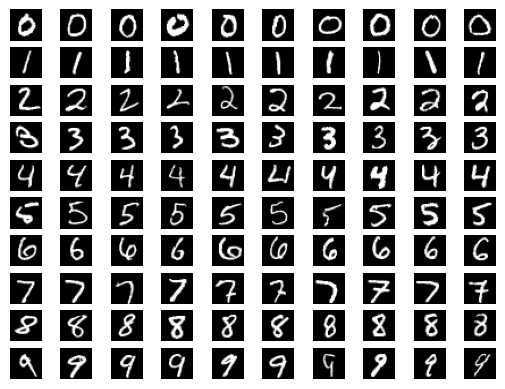

In [ ]:
for i in range(10):
  for j in range(10):
    plt.subplot(10, 10, i*10 + j + 1)
    plt.imshow(test_digits[i*10 + j], cmap='gray')
    plt.axis('off')

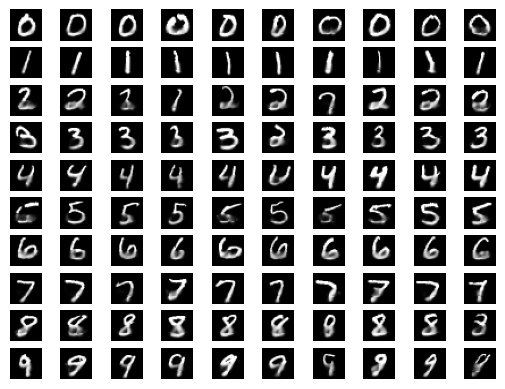

In [ ]:
for i in range(10):
  for j in range(10):
    plt.subplot(10, 10, i*10 + j + 1)
    plt.imshow(digits_gen[i*10 + j], cmap='gray')
    plt.axis('off')

# Variational Autoencoders on Poor Sevens 

In [ ]:
#loading the the data
with open('/content/hw5_tr7.pkl', 'rb') as f:
    train_images = pickle.load(f)
with open('/content/hw5_te7.pkl', 'rb') as f:
    test_images = pickle.load(f)

In [ ]:
# Convert data to torch tensors
train_images = torch.tensor(train_images, dtype=torch.float32)
test_images = torch.tensor(test_images, dtype=torch.float32)

# Print dataset shapes
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: torch.Size([6265, 28, 28])
Testing data shape: torch.Size([1028, 28, 28])


In [ ]:
batch_size = 128
train_dataset = TensorDataset(train_images)
test_dataset = TensorDataset(test_images)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

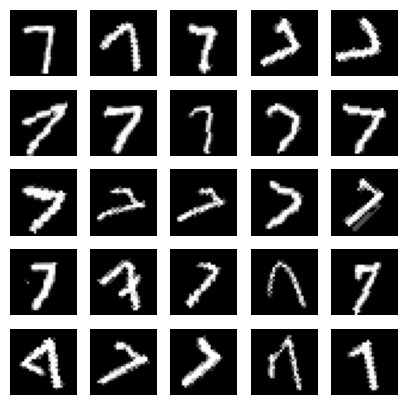

In [ ]:
def display_images(images, num_images=25):
    images = images[:num_images]
    grid_size = 5
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))
    idx = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axes[i, j].imshow(images[idx].squeeze(), cmap='gray')
            axes[i, j].axis('off')
            idx += 1
    plt.show()

# Visualize some training images
display_images(train_images)

In [ ]:
#create a FUlly connected based VAE:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        # starting with encoder layers
        self.encoder_fc1 = nn.Linear(28*28, 512)
        self.encoder_fc2 = nn.Linear(512, 256)
        self.encoder_mean = nn.Linear(256, latent_dim)
        self.encoder_logvar = nn.Linear(256, latent_dim)

        #decoder layer
        self.decoder_fc1 = nn.Linear(latent_dim, 256)
        self.decoder_fc2 = nn.Linear(256, 512)
        self.decoder_fc3 = nn.Linear(512, 28*28)

    def encode(self, x):
        h1= F.relu(self.encoder_fc1(x))
        h2 = F.relu(self.encoder_fc2(h1))
        mean = self.encoder_mean(h2)
        logvar = self.encoder_logvar(h2)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        epsilon = torch.randn_like(std)
        return mean + epsilon * std

    def decode(self, z):
        h1 = F.relu(self.decoder_fc1(z))
        h2 = F.relu(self.decoder_fc2(h1))
        reconstructed = torch.sigmoid(self.decoder_fc3(h2))
        return reconstructed

    def forward(self, x):
        mean, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mean, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mean, logvar

def vae_loss(reconstructed_x, x, mean, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x.view(-1, 28*28), reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

latent_dim = 3
model = VAE(latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 50
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch_data, in train_loader:
        optimizer.zero_grad()
        reconstructed, mean, logvar = model(batch_data)
        loss = vae_loss(reconstructed, batch_data, mean, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    average_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}")

Epoch [1/50], Average Loss: 243.9942
Epoch [2/50], Average Loss: 188.3749
Epoch [3/50], Average Loss: 160.3407
Epoch [4/50], Average Loss: 145.9997
Epoch [5/50], Average Loss: 139.8110
Epoch [6/50], Average Loss: 133.7380
Epoch [7/50], Average Loss: 130.5907
Epoch [8/50], Average Loss: 128.8952
Epoch [9/50], Average Loss: 127.6071
Epoch [10/50], Average Loss: 126.6627
Epoch [11/50], Average Loss: 125.6730
Epoch [12/50], Average Loss: 124.9615
Epoch [13/50], Average Loss: 124.2130
Epoch [14/50], Average Loss: 123.6428
Epoch [15/50], Average Loss: 122.9828
Epoch [16/50], Average Loss: 122.0571
Epoch [17/50], Average Loss: 121.2249
Epoch [18/50], Average Loss: 120.6709
Epoch [19/50], Average Loss: 119.9820
Epoch [20/50], Average Loss: 119.4863
Epoch [21/50], Average Loss: 118.7974
Epoch [22/50], Average Loss: 118.3976
Epoch [23/50], Average Loss: 118.0697
Epoch [24/50], Average Loss: 117.5760
Epoch [25/50], Average Loss: 117.3074
Epoch [26/50], Average Loss: 116.9464
Epoch [27/50], Averag

In [ ]:
def generate_by_varying_latent(model, fixed_z, dim_to_vary, range_vals):
    model.eval()
    images = []
    with torch.no_grad():
        for val in range_vals:
            z = fixed_z.clone()
            z[:, dim_to_vary] = val
            img = model.decode(z)
            images.append(img.view(-1, 28, 28).cpu().numpy())
    return images

In [ ]:
# Choose a base latent vector and vary each dimension
fixed_z = torch.randn(1, latent_dim).repeat(20, 1)
variation_range = np.linspace(-5, 5, 20)
all_images = []

for dim in range(latent_dim):
    varied_images = generate_by_varying_latent(
        model, fixed_z, dim, variation_range
    )
    all_images.append(varied_images)

Varying latent dimension 1


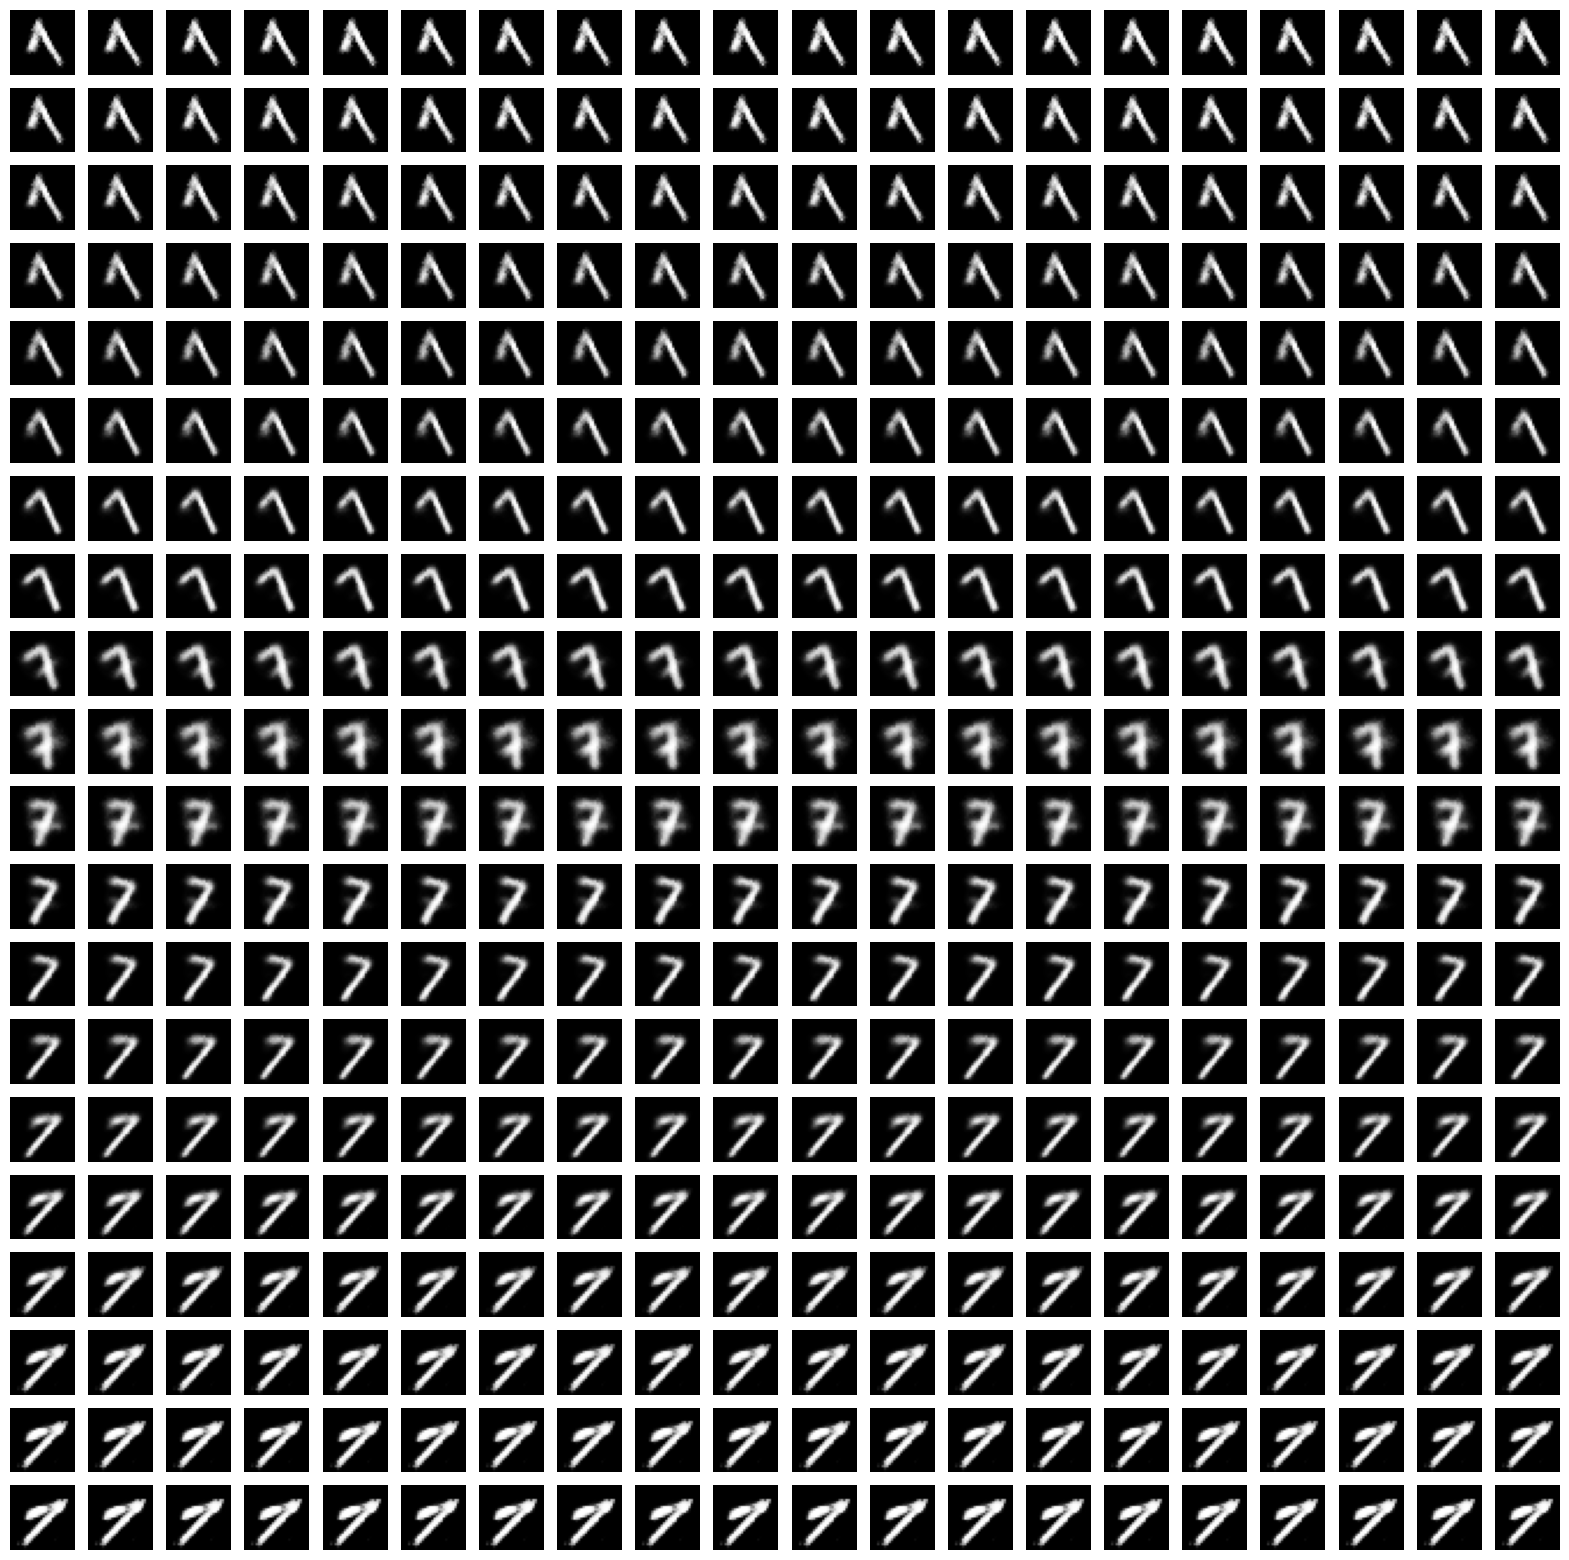

Varying latent dimension 2


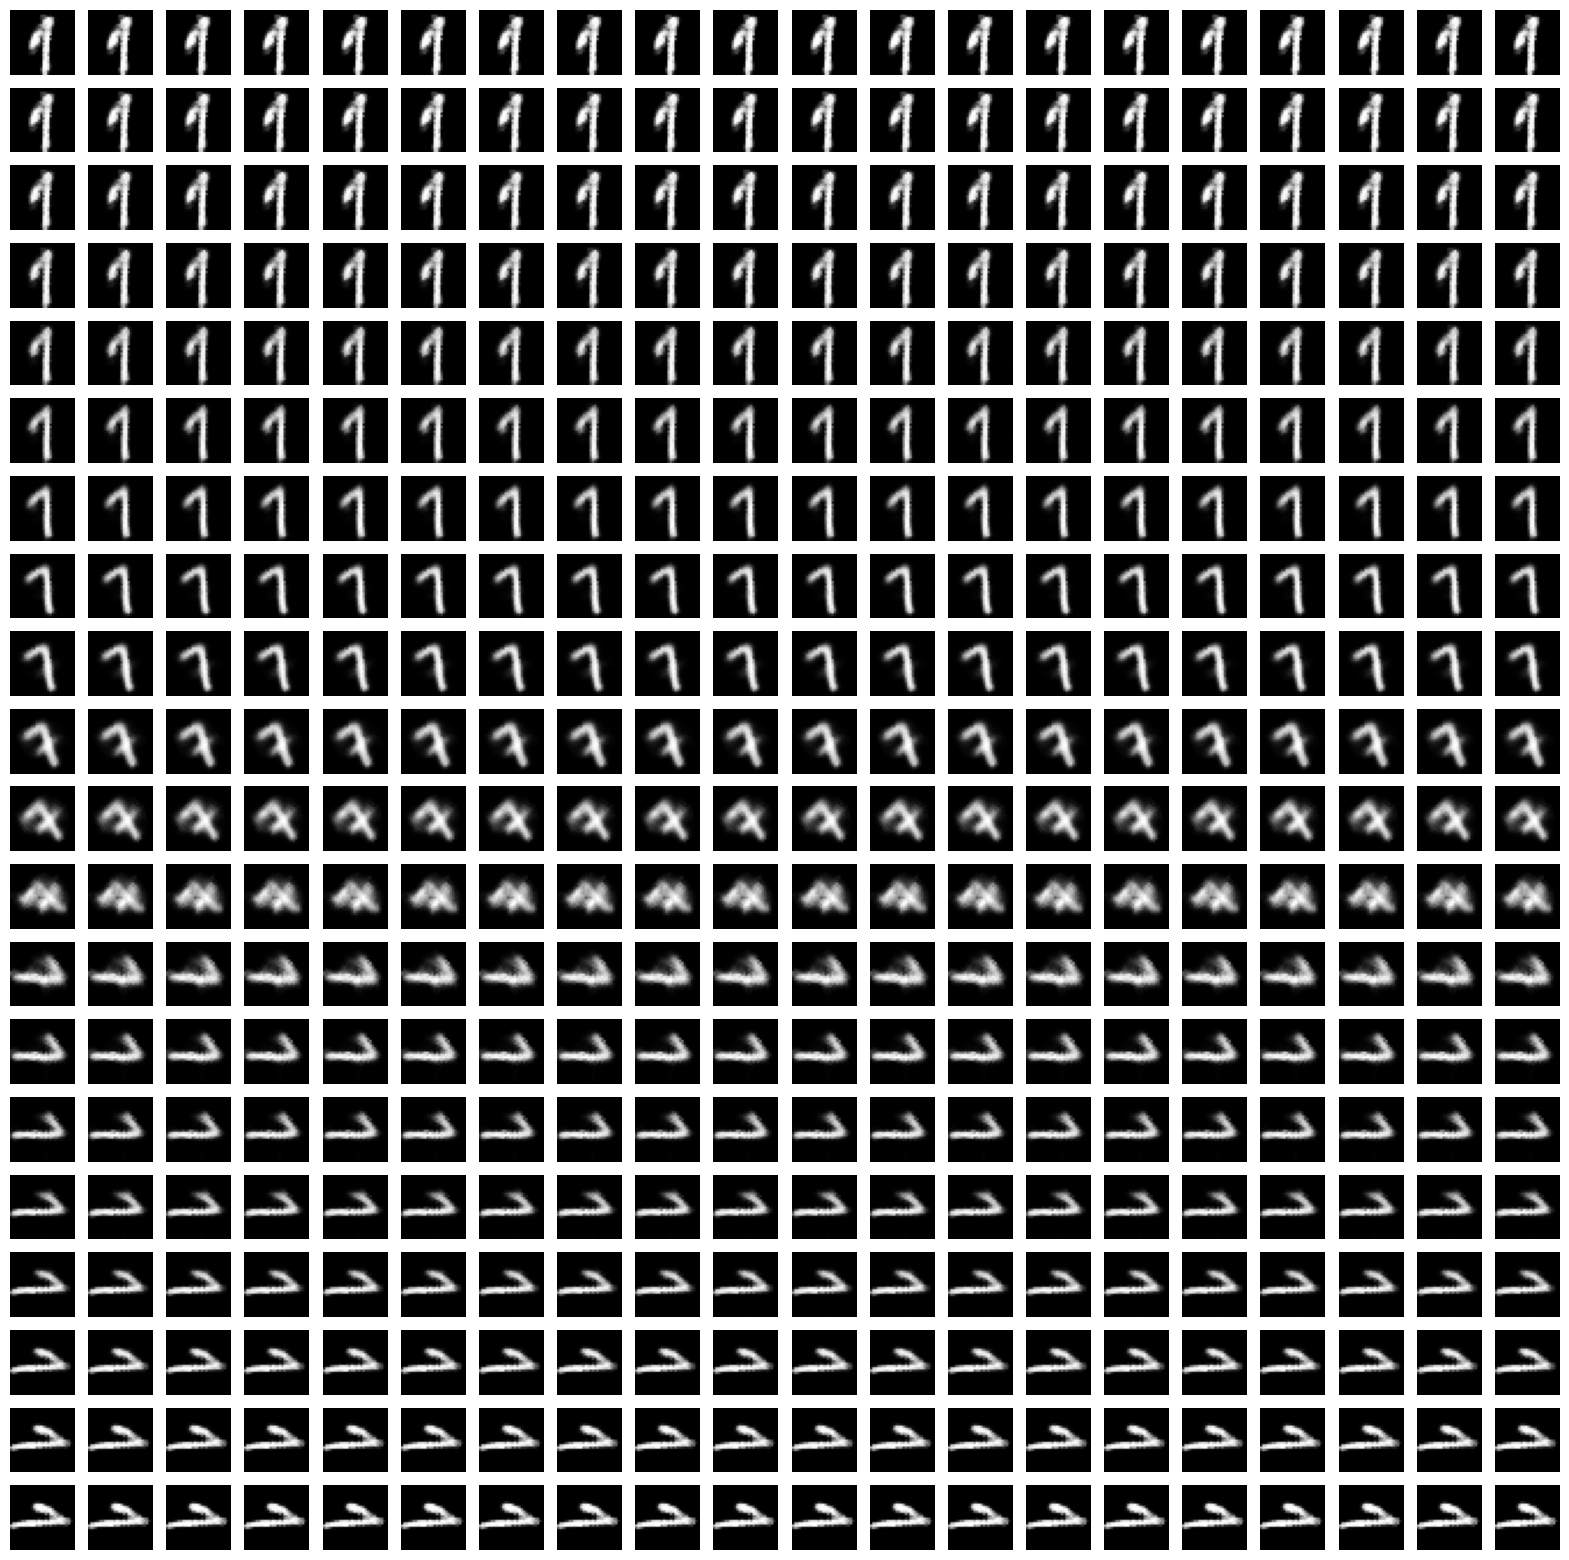

Varying latent dimension 3


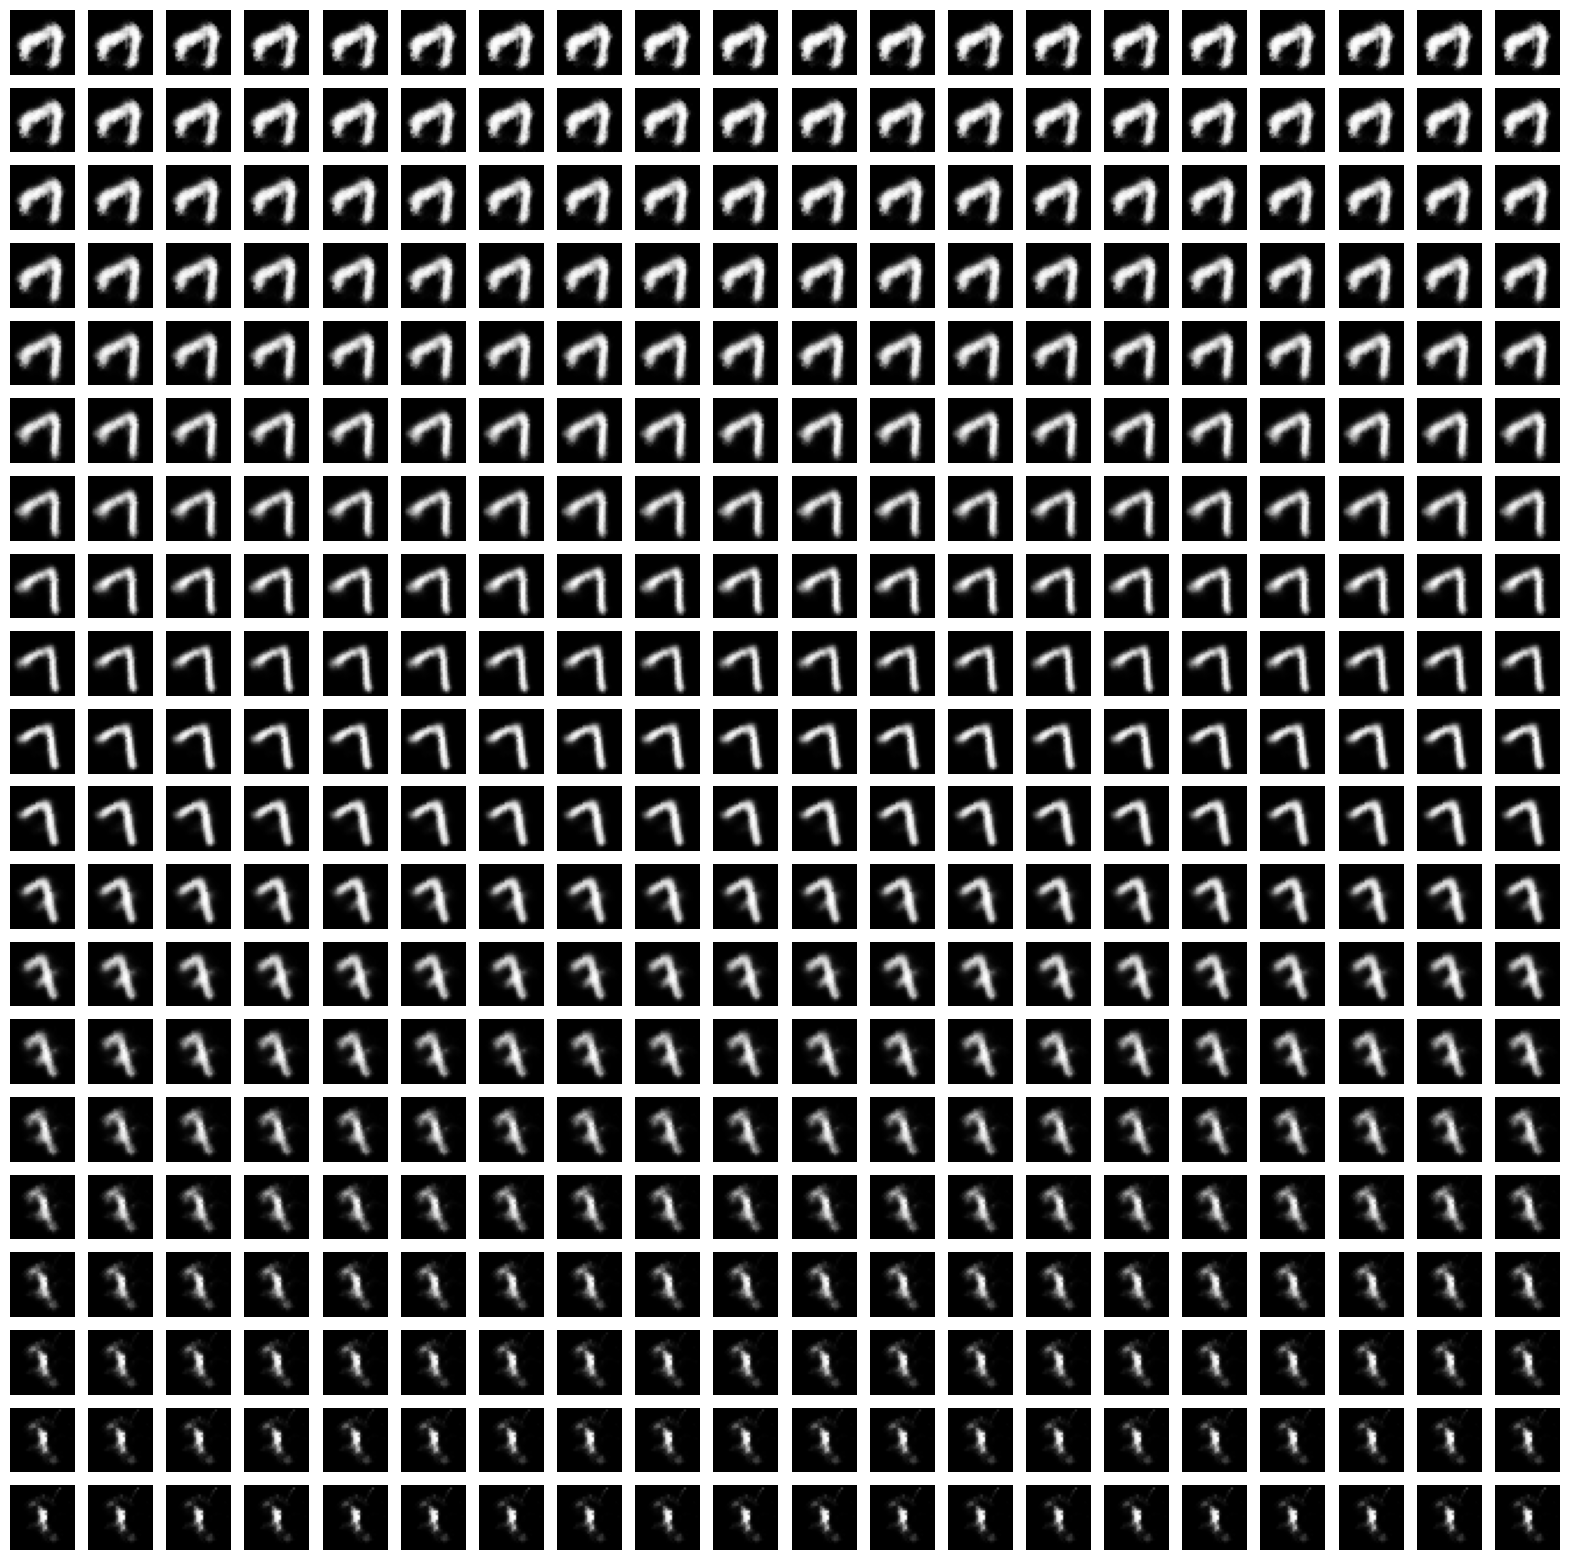

In [ ]:
def display_generated_images(generated_images, latent_dim):
    for idx, images in enumerate(generated_images):
        print(f'Varying latent dimension {idx + 1}')
        images = np.vstack(images)
        num_images = images.shape[0]
        grid_size = int(np.sqrt(num_images))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))
        idx = 0
        for i in range(grid_size):
            for j in range(grid_size):
                if idx < num_images:
                    axes[i, j].imshow(images[idx].squeeze(), cmap='gray')
                    axes[i, j].axis('off')
                    idx += 1
        plt.show()

# Display the generated images
display_generated_images(all_images, latent_dim)

from the above seen latent dimension plot i identify that the features displayed by dimentsion 3 holds the hidden special effects. I kind ogf observe the effects which are not common in the MNIST data in the dimension 3.

#  Conditional GAN 

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [ ]:
#loading MNIST data to use for generator
mnist_trans_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = MNIST(root='./data', train=True, transform=mnist_trans_data, download=True)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.91MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# writing the Generator Architecture
class Generator(nn.Module):
    def __init__(self, noise_dim=100, label_dim=10, output_dim=784):
        super(Generator, self).__init__()
        input_dim = noise_dim + label_dim  # 110
        self.model = nn.Sequential(
            nn.Linear(input_dim,200),
            nn.LeakyReLUeLU(),
            nn.Linear(200,400),
            nn.LeakyReLU(),
            nn.Linear(400,600),
            nn.LeakyReLU(),
            nn.Linear(600,784),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate noise and labels
        generator_input = torch.cat((noise, labels), dim=1)
        output = self.model(generator_input)
        return output

In [ ]:
# Writing the Discriminatot Architecture
class Discriminator(nn.Module):
  def __init__(self, image_dim=784, label_dim=10):
    super(Discriminator, self).__init__()
    input_dim = image_dim + label_dim
    self.model = nn.Sequential(
        nn.Linear(input_dim,512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid()
    )
  def forward(self, images, labels):
      # Concatenate images and labels
      discriminator_input = torch.cat((images, labels), dim=1)
      output = self.model(discriminator_input)
      return output

In [ ]:
discriminator = Discriminator(784, 10)  # Create an instance of Discriminator
generator = Generator(100, 10)
opt_d = optim.Adam(discriminator.parameters(), lr=1e-4)
opt_g = optim.Adam(generator.parameters(), lr=1e-4)
loss_fn=nn.BCELoss()

In [ ]:
#Creating the Training Loop
num_epochs = 300
red=[]
blue=[]
for epoch in range(num_epochs):
    Dis_red_real_corr=0
    gen_fake_blue_correct=0
    for real_images, real_labels in train_loader:
      real_images = real_images.view(-1, 28*28)
      real_labels_one_hot = F.one_hot(real_labels,num_classes=10).float()

      #training the Discriminator
      opt_d.zero_grad()
      fake_labels = torch.randint(0, 10, (100,))
      fake_labels_one_hot = F.one_hot(fake_labels, num_classes=10).float()
      noise= torch.randn(100,100)
      #concat=torch.cat((noise, fake_labels_one_hot), dim=1)
      fake_images = generator(noise, fake_labels_one_hot)

      real_outputs = discriminator(real_images, real_labels_one_hot)
      fake_outputs = discriminator(fake_images, fake_labels_one_hot)

      D_real_loss = loss_fn(real_outputs, torch.ones_like(real_outputs))
      D_fake_loss = loss_fn(fake_outputs, torch.zeros_like(fake_outputs))

      D_loss = D_real_loss + D_fake_loss
      D_loss.backward()
      opt_d.step()

      Dis_red_real_corr += ((real_outputs>=0.5).float()==1).sum().item()

      # Generator Training
      opt_g.zero_grad()
      fake_images = generator(noise, fake_labels_one_hot)
      fake_outputs = discriminator(fake_images, fake_labels_one_hot)
      G_loss = loss_fn(fake_outputs, torch.ones_like(fake_outputs))
      G_loss.backward()
      opt_g.step()

      gen_fake_blue_correct +=((fake_outputs>=0.5).float()==1).sum().item()

    dis_real_red_acc=Dis_red_real_corr/60000
    gen_fake_blue_acc= gen_fake_blue_correct/60000
    red.append(dis_real_red_acc)
    blue.append(gen_fake_blue_acc)
    print(f"epoch:{epoch}| D loss: {D_loss:.4f}| G loss: {G_loss:.4f}| D real acc: {dis_real_red_acc:.4f}| G fake acc: {gen_fake_blue_acc:.4f}")


epoch:0| D loss: 1.3335| G loss: 0.6159| D real acc: 0.8060| G fake acc: 0.3933
epoch:1| D loss: 0.3004| G loss: 2.2700| D real acc: 0.8087| G fake acc: 0.3257
epoch:2| D loss: 0.5727| G loss: 3.2281| D real acc: 0.9029| G fake acc: 0.0240
epoch:3| D loss: 0.4119| G loss: 3.0137| D real acc: 0.9287| G fake acc: 0.0138
epoch:4| D loss: 0.2898| G loss: 3.4811| D real acc: 0.9107| G fake acc: 0.0200
epoch:5| D loss: 0.4242| G loss: 2.2449| D real acc: 0.8876| G fake acc: 0.0294
epoch:6| D loss: 0.5146| G loss: 2.3577| D real acc: 0.8516| G fake acc: 0.0489
epoch:7| D loss: 0.6683| G loss: 2.0266| D real acc: 0.8558| G fake acc: 0.0517
epoch:8| D loss: 0.6282| G loss: 2.0141| D real acc: 0.8475| G fake acc: 0.0622
epoch:9| D loss: 0.6766| G loss: 1.8415| D real acc: 0.8028| G fake acc: 0.0883
epoch:10| D loss: 0.6832| G loss: 1.9041| D real acc: 0.7707| G fake acc: 0.1101
epoch:11| D loss: 0.9591| G loss: 1.4098| D real acc: 0.7531| G fake acc: 0.1183
epoch:12| D loss: 0.9740| G loss: 1.30

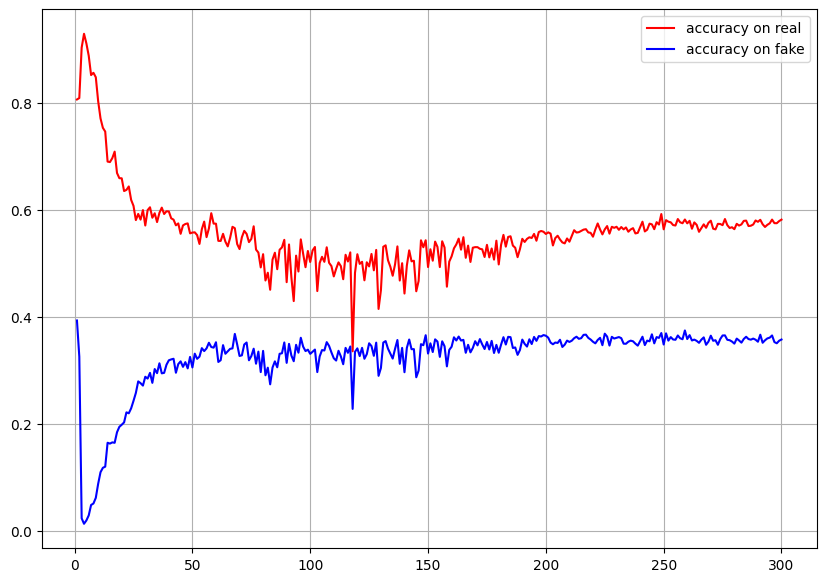

In [ ]:
# Ploting the convergence graph
fig = plt.figure(figsize=(10, 7))
epochs_arr = np.arange(1, num_epochs + 1, 1)
plt.plot(epochs_arr, red, color='red', label="accuracy on real")
plt.plot(epochs_arr, blue, color='blue', label="accuracy on fake")
plt.grid()
plt.legend()
plt.show()

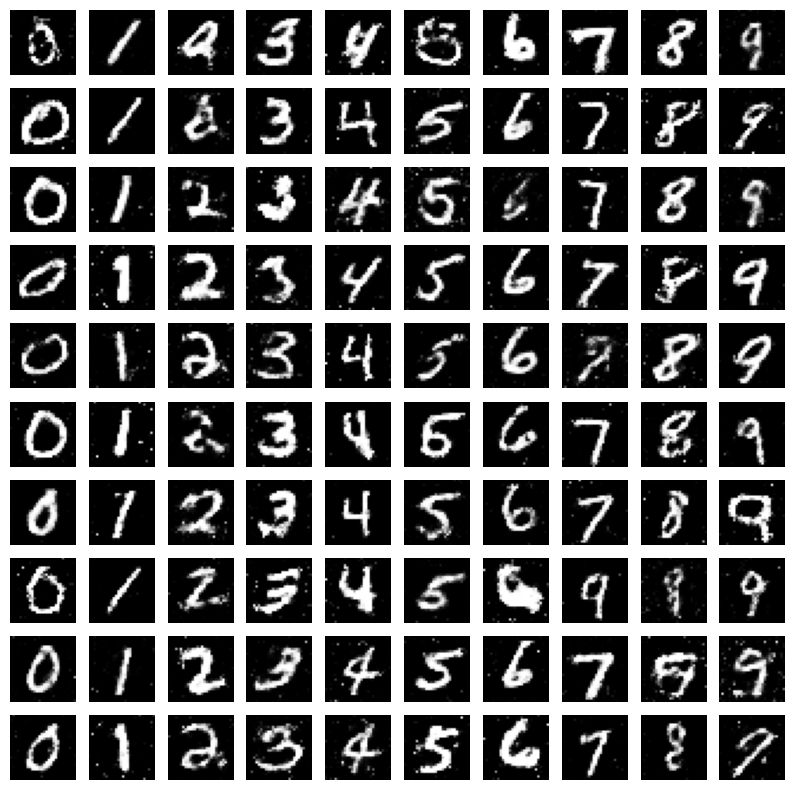

In [ ]:
# Generating and visualizing images
generator.eval()
with torch.no_grad():
    noise_vec = torch.randn(100, 100)
    fake_lbls = torch.arange(10).repeat(10)
    onehot_fake_labels = F.one_hot(fake_lbls, num_classes=10).float()
    generated_data = generator(noise, onehot_fake_labels)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(100):
    axes[i // 10, i % 10].imshow(generated_data[i].view(28, 28).cpu().numpy(),cmap='gray')
    axes[i // 10, i % 10].axis('off')
plt.show()

Observations:

The model is leading to convergence the graphs shows the pattern of it. obtained results are descent and able to generate descent images construction.